In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from IPython.display import display

# load data

In [2]:
# load data
df = pd.read_csv(
    'https://archive.ics.uci.edu/ml/'
    'machine-learning-databases/iris/iris.data',
    header=None)
df.columns = [
    'Sepal length', 'Sepal width', 'Petal length', 'Petal width', 'Class label'
]
display(df.head())

x_ori = df[['Petal length', 'Petal width']].values[50:150]
y, y_label = pd.factorize(df['Class label'].values[50:150])

x = (x_ori - x_ori.mean()) / (x_ori.std())
x.shape, y.shape, y[:5], y_label

,Sepal length,Sepal width,Petal length,Petal width,Class label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


((100, 2),
 (100,),
 array([0, 0, 0, 0, 0], dtype=int64),
 array(['Iris-versicolor', 'Iris-virginica'], dtype=object))

# use sklearn to see the baseline

In [3]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1000.0, random_state=0, solver="liblinear")
lr.fit(x, y)
f'accuracy from sklearn: {np.mean(lr.predict(x) == y)}'

'accuracy from sklearn: 0.94'

# logistic regression with hessian matrix from scratch

In [4]:
# due to my formula, I have to change the data format
x = x.T  # (feature, m)
y = y[None]  # (1, m)

## define model and initial weights in uniform distribution

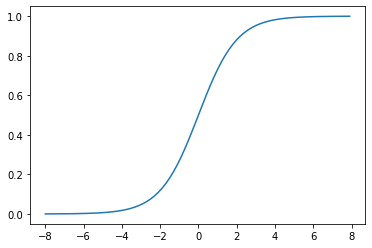

In [5]:
sigmoid = lambda x: 1 / (1 + np.exp(-x))
axis = np.arange(-8, 8, 0.1)
plt.plot(axis, sigmoid(axis))

In [6]:
def h(x):
    global w
    return sigmoid(w.T.dot(x))


w = np.random.uniform(-3e-3, 3e-3, (len(x), 1))

f'initial accuracy: {np.mean((h(x)>0.5) == y)}'

'initial accuracy: 0.6'

## some util function

 To speed up the computation, all of them are written in vector format instead of "for loops".

In [7]:
def likelihood(preds, ys, smooth=1e-8):
    return (ys * np.log(preds + smooth) +
            (1 - ys) * np.log(1 - preds + smooth))


likelihood(h(x), y)

In [8]:
def first_order(x, ys):
    return np.mean((ys - h(x)) * x, axis=1, keepdims=True)


first_order(x, y)

In [9]:
def hessian(x):
    return np.mean(h(x) * (h(x) - 1)) * x.dot(x.T)


hessian(x)

## train

In [10]:
# just choose the median value
threshold = 0.5

In [11]:
# update
for i in range(10):
    w = w - np.linalg.pinv(hessian(x)).dot(first_order(x, y))

## result

In [12]:
preds = (h(x) > threshold).astype(float)
f'accuracy of mine: {np.mean(y == preds)}'

'accuracy of mine: 0.95'

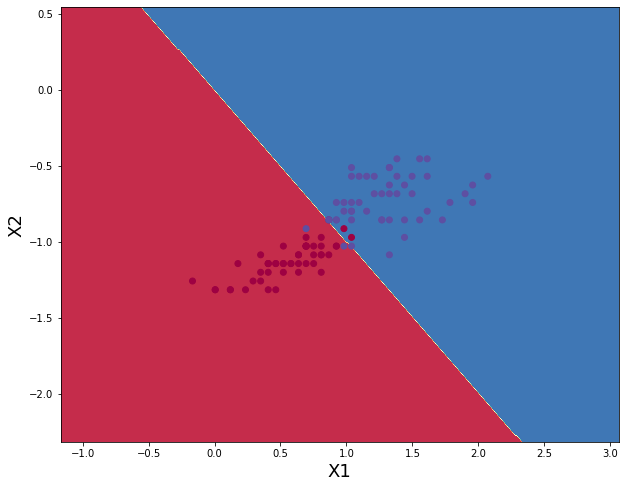

In [13]:
plt.figure(figsize=(10, 8))

# Set min and max values and give it some padding
x_min, x_max = x[0, :].min() - 1, x[0, :].max() + 1
y_min, y_max = x[1, :].min() - 1, x[1, :].max() + 1

res = 0.01
# Generate a grid of points with distance h between them
xx, yy = np.meshgrid(np.arange(x_min, x_max, res),
                     np.arange(y_min, y_max, res))

# Predict the function value for the whole grid
x_c = np.c_[xx.ravel(), yy.ravel()].T
Z = h(x_c) > threshold
Z = Z.reshape(xx.shape)

# Plot the contour and training examples
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
plt.ylabel('X2', size=18)
plt.xlabel('X1', size=18)
plt.scatter(x[0, :], x[1, :], c=y[0], cmap=plt.cm.Spectral)